In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/idx virtual internship experience/loan_data_2007_2014.csv')
pd.set_option('display.max_columns',None)
df.sample(5)

<ipython-input-5-413e24c99c0a>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/idx virtual internship experience/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
134654,134654,5404892,6777054,12000,12000,12000.0,36 months,18.49,436.79,D,D2,MAHLE eNGINE cOMPONENTS,10+ years,MORTGAGE,40000.0,Verified,Jun-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 05/21/13 > THE PAY OFF<br>,credit_card,The Pay-Off,373xx,TN,32.94,0.0,Sep-99,0.0,NaN,117.0,9.0,1.0,16901,90.9,14.0,f,2088.50,2088.50,13536.81,13536.81,9911.50,3625.31,0.0,0.0,0.0,Jan-16,436.79,Feb-16,Jan-16,1.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,987.0,66540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18600.0,NaN,NaN,NaN
442232,442232,11925221,13917372,10000,10000,10000.0,36 months,20.49,374.14,E,E2,Closing/HUD specialist,5 years,RENT,35000.0,Not Verified,Feb-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 02/16/14 > Need to pay off...,debt_consolidation,Debt consolidation,080xx,NJ,14.68,0.0,May-97,3.0,30.0,NaN,6.0,0.0,7087,87.5,18.0,f,0.00,0.00,12351.78,12351.78,10000.00,2351.78,0.0,0.0,0.0,Jun-15,6739.68,NaN,Jan-16,0.0,41.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,7087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8100.0,NaN,NaN,NaN
170773,170773,3164500,3927210,19200,19200,19175.0,60 months,13.11,437.95,B,B4,department home land security,10+ years,RENT,92000.0,Verified,Feb-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/15/13 > to pay off high...,debt_consolidation,my loan,905xx,CA,21.52,1.0,Apr-98,0.0,12.0,NaN,8.0,0.0,14668,48.7,31.0,w,9536.21,9523.79,15326.21,15306.25,9663.79,5662.42,0.0,0.0,0.0,Jan-16,437.95,Feb-16,Jan-16,0.0,12.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30100.0,NaN,NaN,NaN
165795,165795,3348147,4150750,5000,5000,5000.0,36 months,6.03,152.18,A,A1,Lockheed Martin,6 years,MORTGAGE,89000.0,Not Verified,Feb-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Credit card Consolidation,088xx,NJ,17.13,0.0,May-99,1.0,NaN,NaN,9.0,0.0,87,0.3,45.0,w,0.00,0.00,5323.56,5323.56,5000.00,323.56,0.0,0.0,0.0,Jun-14,3040.86,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,290294.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30247.0,NaN,NaN,NaN
371782,371782,18815016,20987760,12975,12975,12975.0,36 months,10.15,419.59,B,B2,Owner,10+ years,MORTGAGE,57000.0,Not Verified,Jun-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,563xx,MN,21.89,0.0,Oct-01,0.0,28.0,NaN,16.0,0.0,28837,43.3,32.0,f,6617.61,6617.61,7972.21,7972.21,6357.39,1614.82,0.0,0.0,0.0,Jan-16,419.59,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,210757.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66600.0,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
(df.isna().mean()[df.isna().mean()==1])*100

annual_inc_joint             100.0
dti_joint                    100.0
verification_status_joint    100.0
open_acc_6m                  100.0
open_il_6m                   100.0
open_il_12m                  100.0
open_il_24m                  100.0
mths_since_rcnt_il           100.0
total_bal_il                 100.0
il_util                      100.0
open_rv_12m                  100.0
open_rv_24m                  100.0
max_bal_bc                   100.0
all_util                     100.0
inq_fi                       100.0
total_cu_tl                  100.0
inq_last_12m                 100.0
dtype: float64

In [8]:
#Removing empty features
for i in df:
  if df[i].isna().mean()==1:
    df = df.drop(i,axis=1)

In [9]:
df1 = df.copy()

In [10]:
#Target leakage
df1 = df1.drop(columns=['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                        'total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
                        'last_pymnt_amnt', 'next_pymnt_d','last_credit_pull_d','funded_amnt','funded_amnt_inv','pymnt_plan'])

To prevent data leakage, any variable updated (or created) after the target value is realized should be excluded.

In [11]:
df[['loan_status']].value_counts()

loan_status                                        
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
dtype: int64

In [12]:
#Target
loanstat = {
    'Fully Paid' : 'Low',
    'Charged Off' : 'High',
    'Late (31-120 days)' : 'High',
    'Does not meet the credit policy. Status:Fully Paid' : 'Low',
    'Default' : 'High',
    'Does not meet the credit policy. Status:Charged Off' : 'High'
}
df1['loan_status'] = df1['loan_status'].replace(loanstat)
df1 = df1.loc[(df1['loan_status'] == 'Low') | (df1['loan_status'] == 'High')]

#EDA

In [13]:
df1.shape

(237695, 42)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   237695 non-null  int64  
 1   id                           237695 non-null  int64  
 2   member_id                    237695 non-null  int64  
 3   loan_amnt                    237695 non-null  int64  
 4   term                         237695 non-null  object 
 5   int_rate                     237695 non-null  float64
 6   installment                  237695 non-null  float64
 7   grade                        237695 non-null  object 
 8   sub_grade                    237695 non-null  object 
 9   emp_title                    224305 non-null  object 
 10  emp_length                   228539 non-null  object 
 11  home_ownership               237695 non-null  object 
 12  annual_inc                   237691 non-null  float64
 13 

In [15]:
#Checking null values
df1.isna().sum()[df1.isna().sum()>0]

emp_title                       13390
emp_length                       9156
annual_inc                          4
desc                           145726
title                              15
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         132992
mths_since_last_record         208951
open_acc                           29
pub_rec                            29
revol_util                        231
total_acc                          29
collections_12_mths_ex_med        145
mths_since_last_major_derog    195525
acc_now_delinq                     29
tot_coll_amt                    66596
tot_cur_bal                     66596
total_rev_hi_lim                66596
dtype: int64

In [16]:
#Checking Duplicate
df1.duplicated(subset=['member_id']).sum()

0

In [17]:
df1 = df1.drop(columns=['Unnamed: 0','id','member_id'],axis=1)

In [18]:
#Splitting numerical and categorical data
num = df1.select_dtypes(exclude=['object'])
kat = df1.select_dtypes(include=['object'])

####Numerikal

In [19]:
#Statistical Descriptive
num.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,237695.0,13474.354320,8061.451689,500.00,7200.00,12000.00,18000.00,35000.00
int_rate,237695.0,13.844646,4.378830,5.42,10.99,13.67,16.59,26.06
installment,237695.0,416.623498,243.631791,15.67,239.18,365.01,545.33,1408.13
annual_inc,237691.0,71926.294970,55163.505912,1896.00,45000.00,61421.00,86000.00,7141778.00
dti,237695.0,16.428473,7.694727,0.00,10.71,16.13,21.87,39.99
delinq_2yrs,237666.0,0.247297,0.733771,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,237666.0,0.906869,1.173854,0.00,0.00,1.00,1.00,33.00
mths_since_last_delinq,104703.0,34.936563,21.842771,0.00,16.00,32.00,51.00,152.00
mths_since_last_record,28744.0,75.259428,31.690372,0.00,54.00,80.00,102.00,129.00
open_acc,237666.0,10.854047,4.825149,0.00,7.00,10.00,13.00,76.00


Notes:
- policy code only has 1 value

In [20]:
num1 = num.columns.tolist()
len(num1)

21

In [21]:
from google.colab import files

<ipython-input-22-dc3b7403bdcb>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df1[num1[i]])


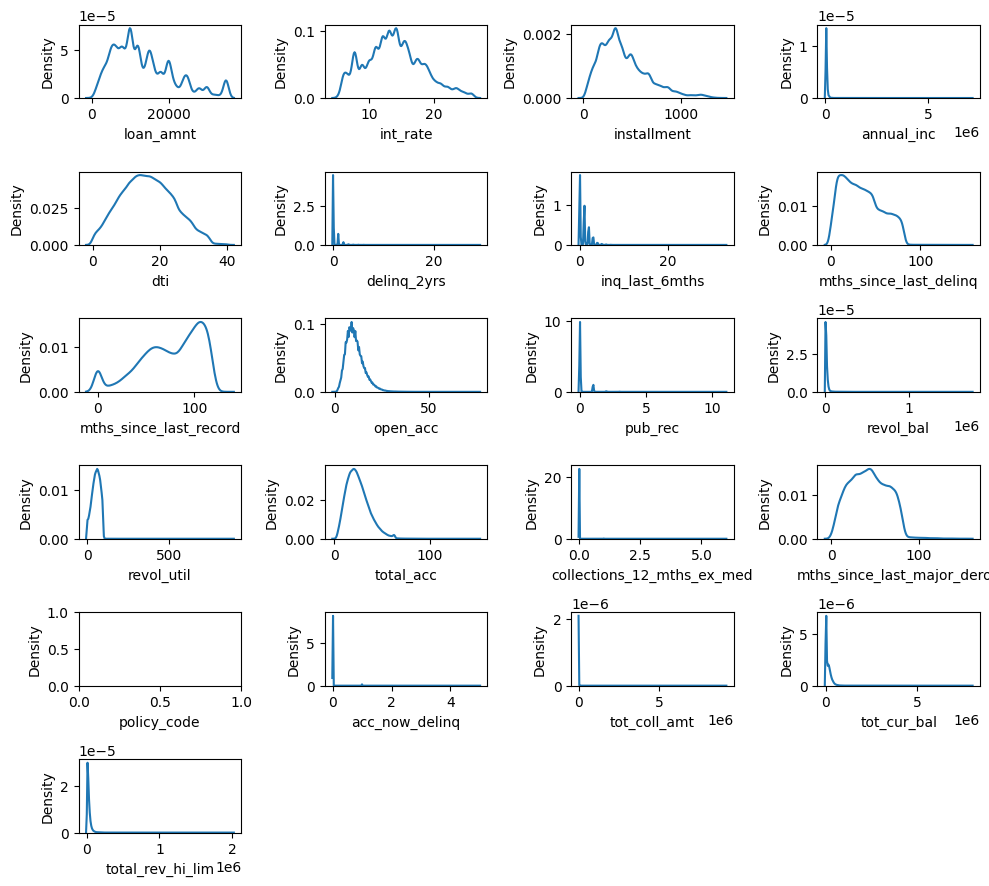

In [22]:
#univariate
plt.figure(figsize=(10,10))
for i in range(0,len(num1)):
  plt.subplot(7,4,i+1)
  sns.kdeplot(x=df1[num1[i]])
  plt.tight_layout()
  
  # plt.savefig('num.jpg')
  # files.download('num.jpg')

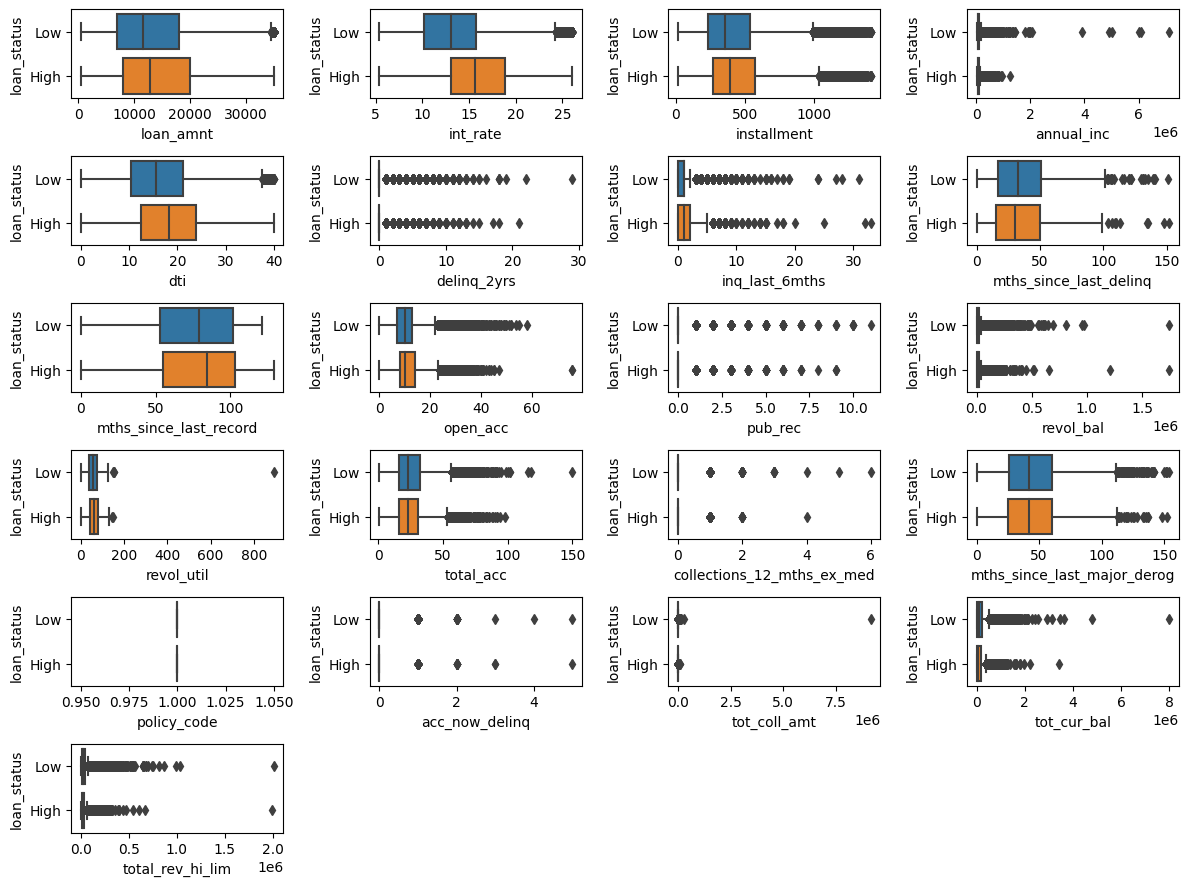

In [23]:
#bivariate
plt.figure(figsize=(12,10))
for i in range (0,len(num1)):
  plt.subplot(7,4,i+1)
  sns.boxplot(data=df1,x=df1[num1[i]],y='loan_status')
  plt.tight_layout()

  # plt.savefig('bivariate_num.jpg')
  # files.download('bivariate_num.jpg')

<Axes: >

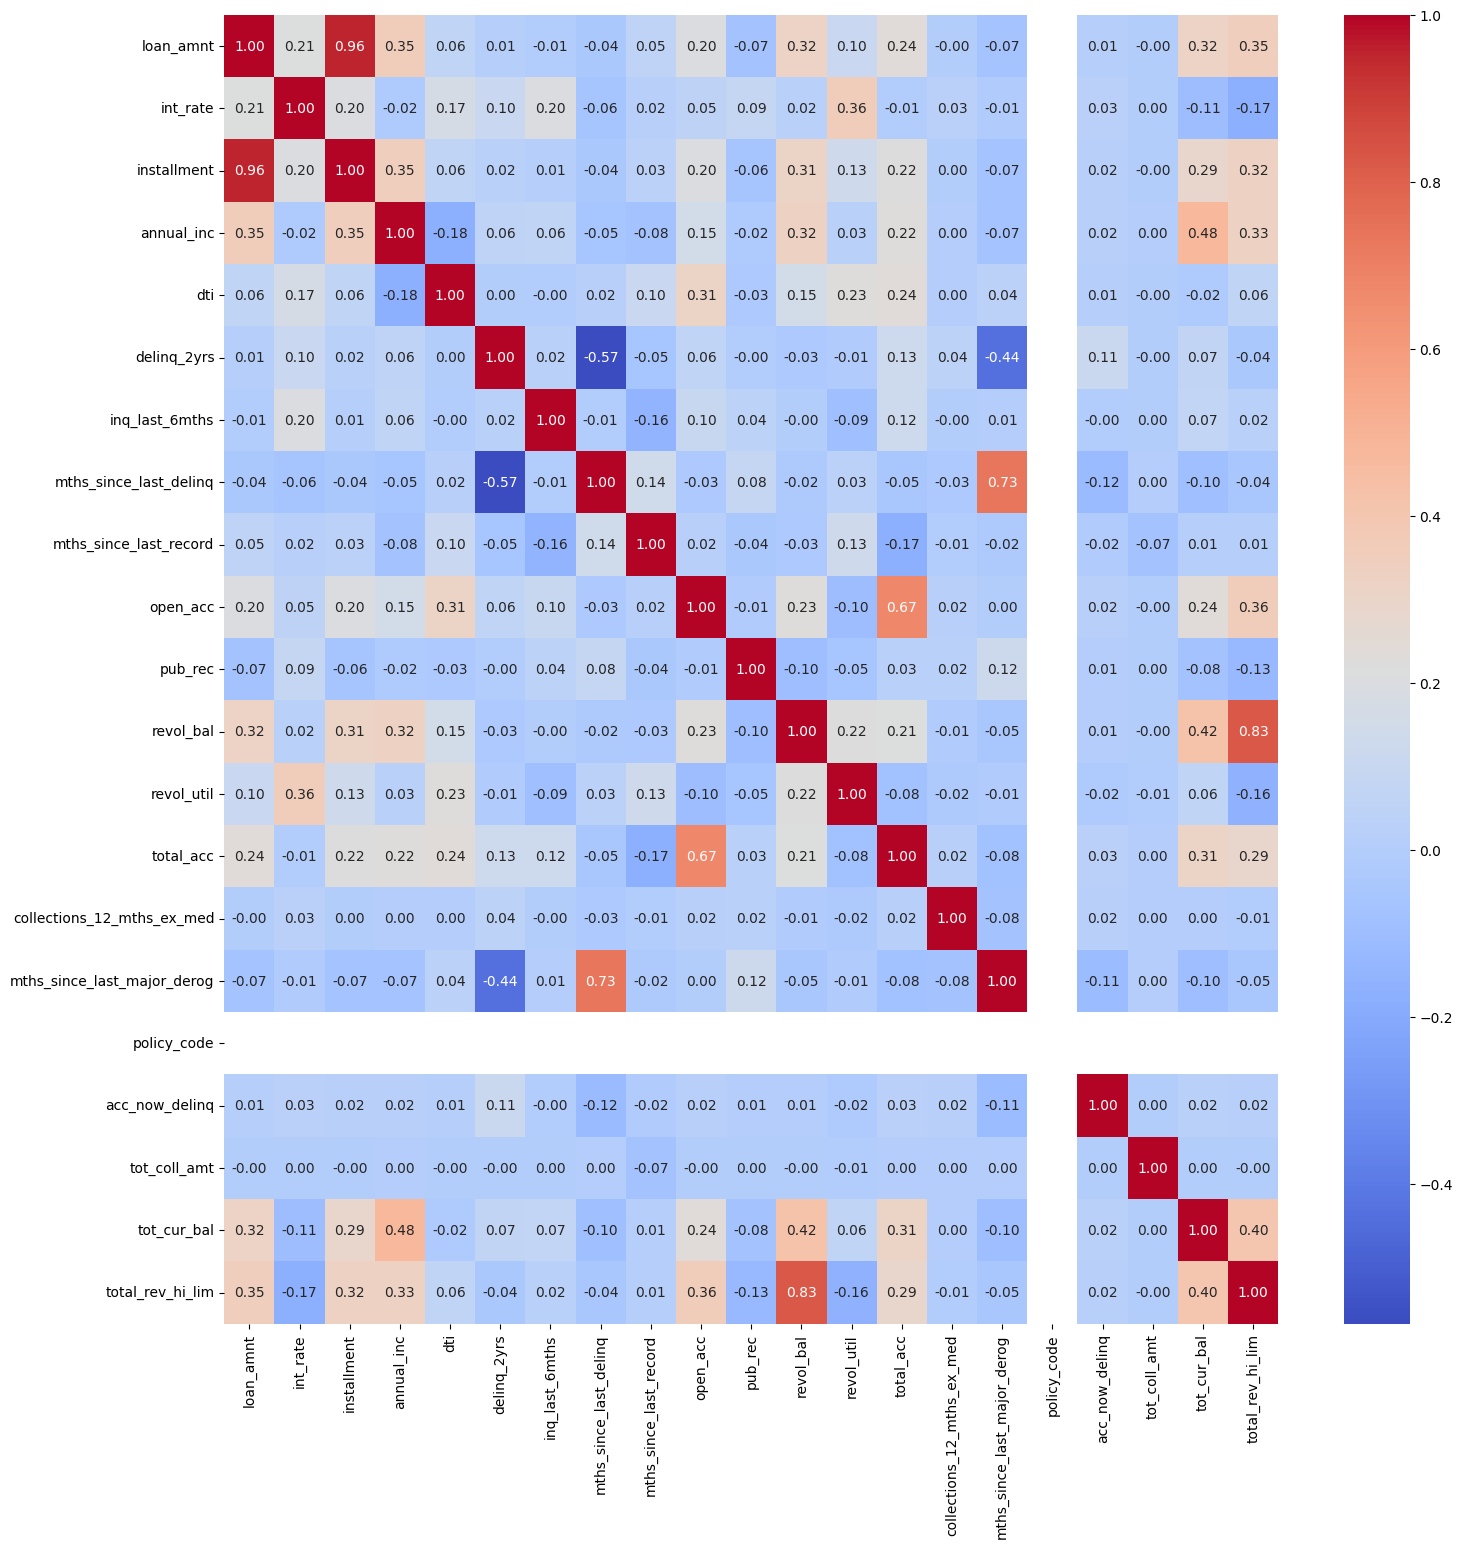

In [24]:
#correlation
plt.figure(figsize=(17,17))
sns.heatmap(num.corr(),annot=True,fmt='.2f',cmap='coolwarm')

# plt.savefig('num_corr.jpg')
# files.download('num_corr.jpg')

some features have a high correlation such as:
- loan amnt and installment (0.96)
- revol bal and total rev hi lim (0.83)
- open acc and total acc (0.67)
- mths since last major derog and mths since last delinq (0.73)

####Kategorikal

In [25]:
#Statistical Descriptive
kat.describe().T

,count,unique,top,freq
term,237695,2,36 months,185700
grade,237695,7,B,71990
sub_grade,237695,35,B3,17316
emp_title,224305,129469,Teacher,1633
emp_length,228539,11,10+ years,70939
home_ownership,237695,6,MORTGAGE,116769
verification_status,237695,3,Verified,88337
issue_d,237695,91,Oct-14,9704
loan_status,237695,2,Low,186727
url,237695,237695,https://www.lendingclub.com/browse/loanDetail....,1


In [26]:
for i in kat:
  print(i)
  print(df1[i].value_counts())
  print()

term
 36 months    185700
 60 months     51995
Name: term, dtype: int64

grade
B    71990
C    60683
A    39442
D    38431
E    17911
F     7273
G     1965
Name: grade, dtype: int64

sub_grade
B3    17316
B4    16057
C1    13950
B2    13874
B5    13368
C2    13305
C3    11851
B1    11375
C4    11144
A5    11074
C5    10433
A4    10370
D1     9475
D2     8645
D3     7565
D4     6990
A3     6746
A2     5758
D5     5756
A1     5494
E1     4319
E2     4313
E3     3510
E4     3118
E5     2651
F1     2083
F2     1662
F3     1493
F4     1134
F5      901
G1      661
G2      478
G3      330
G4      257
G5      239
Name: sub_grade, dtype: int64

emp_title
Teacher                     1633
Manager                     1597
RN                           712
Registered Nurse             708
Supervisor                   703
                            ... 
SRI                            1
MGM Grand Detroit Casino       1
carquest auto parts            1
Source4Teachers                1
Server Engineer 

Notes  
Unnecessary Columns:
- sub-grade (already representated by grade)
- emp title (too many nuniques 205475)
- url
- desc
- title
- zipcode
- addr_state
- application_type
- pymnt_plan (almost all values are n)

Unclear Values:
- purpose  
major purchase = purchase > 500$ (car, home_improvement, moving, house, educational, renewable energy)
- purpose
debt consolidation, credit card, and other(all option would be moved to other)
- home_ownership
none other and any will become none

Feature Tranformation (encoding):
- loan_status (target): Low 0, high 1
- grade (A-G) = (1-8)
- term : ohe
- home ownership : ohe
- purpose: ohe
- verification_status : ohe

In [27]:
kat1 = kat.loc[:,kat.nunique()<15]
kat1 = kat1.columns.tolist()
len(kat1)

9

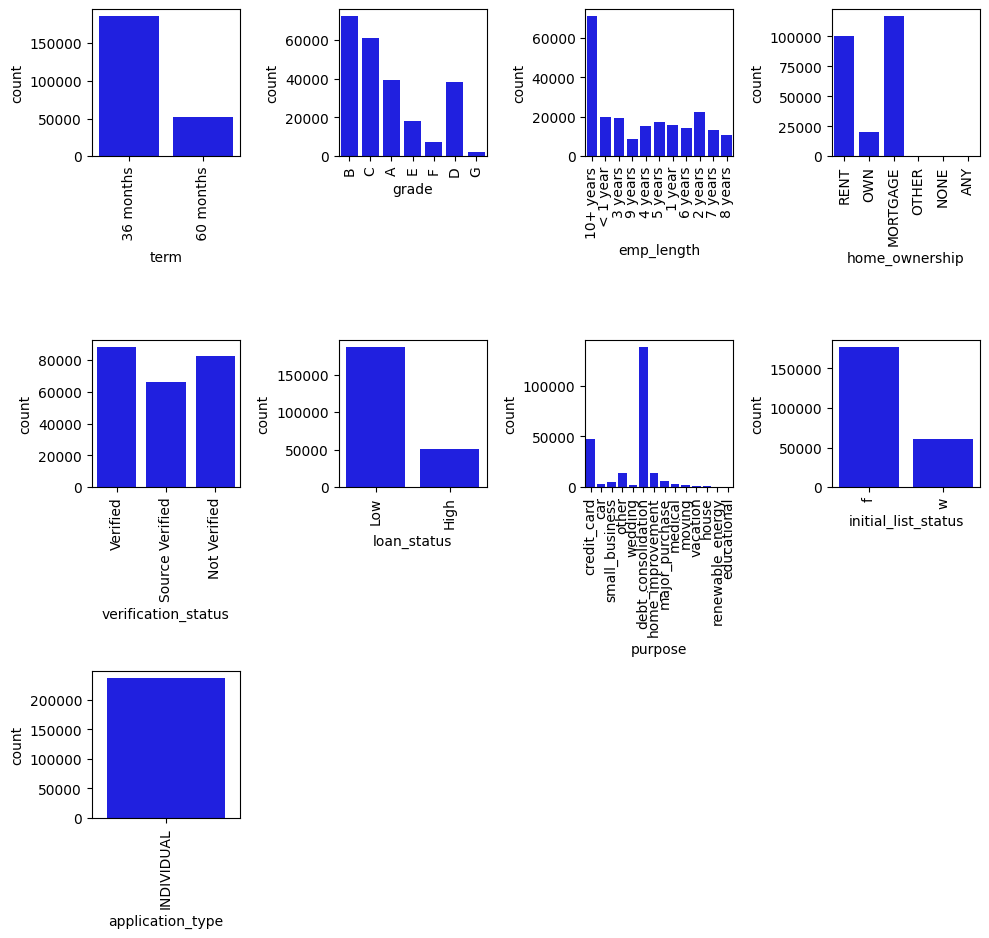

In [28]:
#Univariate
plt.figure(figsize=(10,15))
for i in range(0,len(kat1)):
  plt.subplot(5,4,i+1)
  sns.countplot(x=df1[kat1[i]],color='blue')
  plt.tight_layout()
  plt.xticks(rotation=90)

  # plt.savefig('uni_categorical.jpg')
  # files.download('uni_categorical.jpg')

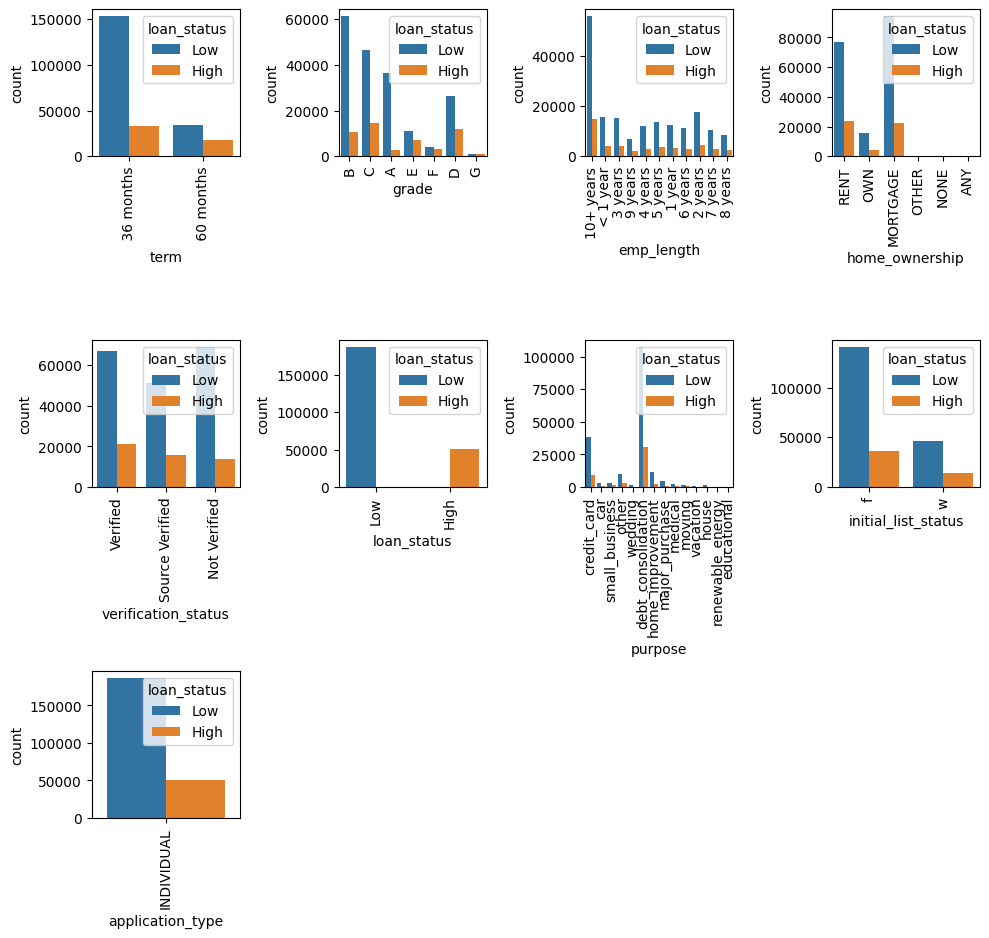

In [29]:
#Bivariate
plt.figure(figsize=(10,15))
for i in range(0,len(kat1)):
  plt.subplot(5,4,i+1)
  sns.countplot(x=df1[kat1[i]],hue=df1['loan_status'])
  plt.tight_layout()
  plt.xticks(rotation=90)

  # plt.savefig('biv_categorical.jpg')
  # files.download('biv_categorical.jpg')

#Preprocessing

####Data Cleaning

In [30]:
df2 = df1.copy()

In [31]:
#Unnecessary Columns
df2 = df2.drop(columns=['policy_code','sub_grade','emp_title','url','desc','title',
                        'zip_code','addr_state','application_type'],axis=1)

In [32]:
emplength = {
    '10+ years' : 10,    
    '2 years' : 2,
    '< 1 year' : 0,
    '3 years' : 3,
    '5 years' : 5,
    '1 year' : 1,
    '4 years' : 4,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9 
}
df2['emp_length'] = df2['emp_length'].replace(emplength)

In [33]:
#removing high correlated 
df2 = df2.drop(columns=['installment','total_rev_hi_lim','total_acc','mths_since_last_delinq'],axis=1)

In [34]:
#Handling missing values
(df2.isna().mean()[df2.isna().mean()>0])*100

emp_length                      3.851995
annual_inc                      0.001683
delinq_2yrs                     0.012201
earliest_cr_line                0.012201
inq_last_6mths                  0.012201
mths_since_last_record         87.907192
open_acc                        0.012201
pub_rec                         0.012201
revol_util                      0.097183
collections_12_mths_ex_med      0.061003
mths_since_last_major_derog    82.258777
acc_now_delinq                  0.012201
tot_coll_amt                   28.017417
tot_cur_bal                    28.017417
dtype: float64

- membuang kolom yang memiliki persentase null diatas 50%
- data yang memiiliki nilai null dibawah 10% dan bersifat numerikal akan diisi dengan median sedangkan yang bersifat kategorikal akan dibuang. 
- untuk kolom dengan 28% null value akan diisi dengan modus
(mau isi dengan modus tapi apa ga jadi bias?)

In [35]:
for i in df2:
  if (df2[i].isna().mean())*100 > 50:
    df2 = df2.drop(i,axis=1)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   237695 non-null  int64  
 1   term                        237695 non-null  object 
 2   int_rate                    237695 non-null  float64
 3   grade                       237695 non-null  object 
 4   emp_length                  228539 non-null  float64
 5   home_ownership              237695 non-null  object 
 6   annual_inc                  237691 non-null  float64
 7   verification_status         237695 non-null  object 
 8   issue_d                     237695 non-null  object 
 9   loan_status                 237695 non-null  object 
 10  purpose                     237695 non-null  object 
 11  dti                         237695 non-null  float64
 12  delinq_2yrs                 237666 non-null  float64
 13  earliest_cr_li

In [37]:
#emp_length
emplength = {
    '10+ years' : 10,    
    '2 years' : 2,
    '< 1 year' : 0,
    '3 years' : 3,
    '5 years' : 5,
    '1 year' : 1,
    '4 years' : 4,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9 
}
df2['emp_length'] = df2['emp_length'].replace(emplength)
df2['emp_length'] = df2['emp_length'].fillna(0)

In [38]:
#fill missing values with median
fill_median = ['open_acc','delinq_2yrs','inq_last_6mths','pub_rec','revol_util','collections_12_mths_ex_med',
               'acc_now_delinq','tot_coll_amt','tot_cur_bal']

df2[fill_median] = df2[fill_median].fillna(df2[fill_median].median())

In [39]:
#removing rows with missing value
df2 = df2.dropna(subset=['annual_inc','earliest_cr_line'], how='any', axis=0)

####Feature Engineering

In [40]:
#credit length history
#deficit from issue date and earliest credit line

df2['issue_d'] = pd.to_datetime(df2['issue_d'], format = '%b-%y')
df2['issue_d'].describe()

<ipython-input-40-d074bc2132bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['issue_d'] = pd.to_datetime(df2['issue_d'], format = '%b-%y')
<ipython-input-40-d074bc2132bd>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2['issue_d'].describe()


count                  237666
unique                     91
top       2014-10-01 00:00:00
freq                     9704
first     2007-06-01 00:00:00
last      2014-12-01 00:00:00
Name: issue_d, dtype: object

In [41]:
df2['issue_d'].head(3)

0   2011-12-01
1   2011-12-01
2   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [42]:
#checking earliest credit line range

pd.set_option('display.max_rows',None)

year = df2['earliest_cr_line'].str.split('-').str[1]
month = df2['earliest_cr_line'].str.split('-').str[0]
year = pd.to_numeric(year)
year.value_counts(dropna=False)

0     19093
1     17910
99    17198
2     14963
98    14946
3     12770
97    12392
96    11976
4     11098
95    11065
94     9912
5      9298
6      8698
93     7680
7      6435
92     5512
90     5370
91     5118
89     4702
88     3887
8      3577
87     3276
86     2773
85     2476
84     2248
83     1838
9      1590
82     1317
81      998
10      953
80      917
78      903
79      876
77      656
76      519
75      409
74      371
73      305
11      294
72      272
70      206
71      201
69      155
67      118
68      118
66       69
65       50
63       38
64       38
62       25
60       16
59        9
61        9
58        6
56        5
54        4
55        4
50        1
57        1
46        1
48        1
Name: earliest_cr_line, dtype: int64

- Tahun tertua: 1946
- Tahun termuda: 2011

In [43]:
year = year.apply(lambda x: x+2000 if x<46 else x+1900)
year = year.apply(lambda x: f'{x:g}')
year = year.astype(str)

In [44]:
date = month + "-" + year
date = pd.to_datetime(date, format = '%b-%Y')
date.head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [45]:
df2['cr_length_history'] = (df2['issue_d'] - date).dt.days
df2['cr_length_history'].describe()

count    237666.000000
mean       5528.583251
std        2561.731327
min         184.000000
25%        3834.000000
50%        5053.000000
75%        6787.000000
max       24138.000000
Name: cr_length_history, dtype: float64

In [46]:
#drop issue_d dan earliest_cr_line
df2 = df2.drop(columns=['earliest_cr_line','issue_d'],axis=1)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237666 entries, 0 to 466283
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   237666 non-null  int64  
 1   term                        237666 non-null  object 
 2   int_rate                    237666 non-null  float64
 3   grade                       237666 non-null  object 
 4   emp_length                  237666 non-null  float64
 5   home_ownership              237666 non-null  object 
 6   annual_inc                  237666 non-null  float64
 7   verification_status         237666 non-null  object 
 8   loan_status                 237666 non-null  object 
 9   purpose                     237666 non-null  object 
 10  dti                         237666 non-null  float64
 11  delinq_2yrs                 237666 non-null  float64
 12  inq_last_6mths              237666 non-null  float64
 13  open_acc      

####Feature Transformation

In [48]:
#purpose
df2.loc[(df2.purpose != 'debt_consolidation')&(df2.purpose != 'credit_card'),'purpose'] = 'other'
df2['purpose'].value_counts()
df2 = pd.get_dummies(df2,columns=['purpose'])

In [49]:
#home_ownership
df2['home_ownership'] = df2['home_ownership'].str.lower()
ho = {
    'other' : 'none',
    'any' : 'none'
}
df2['home_ownership'] = df2['home_ownership'].replace(ho)
df2 = pd.get_dummies(df2,columns=['home_ownership'])

In [50]:
#initial_list_status
df2 = pd.get_dummies(df2,columns=['initial_list_status'])

In [51]:
#term
df2 = pd.get_dummies(df2,columns=['term'])

In [52]:
#verification_status
df2 = pd.get_dummies(df2,columns=['verification_status'])

In [53]:
#label encoding
#grade
grade = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}
df2['grade'] = df2['grade'].replace(grade)

In [54]:
#Target
df2 = df2.rename(columns={'loan_status':'target'})
target= {
    'Low' : 1,
    'High' : 0
}
df2['target'] = df2['target'].replace(target)

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237666 entries, 0 to 466283
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            237666 non-null  int64  
 1   int_rate                             237666 non-null  float64
 2   grade                                237666 non-null  int64  
 3   emp_length                           237666 non-null  float64
 4   annual_inc                           237666 non-null  float64
 5   target                               237666 non-null  int64  
 6   dti                                  237666 non-null  float64
 7   delinq_2yrs                          237666 non-null  float64
 8   inq_last_6mths                       237666 non-null  float64
 9   open_acc                             237666 non-null  float64
 10  pub_rec                              237666 non-null  float64
 11  revol_bal    

####Feature Selection

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

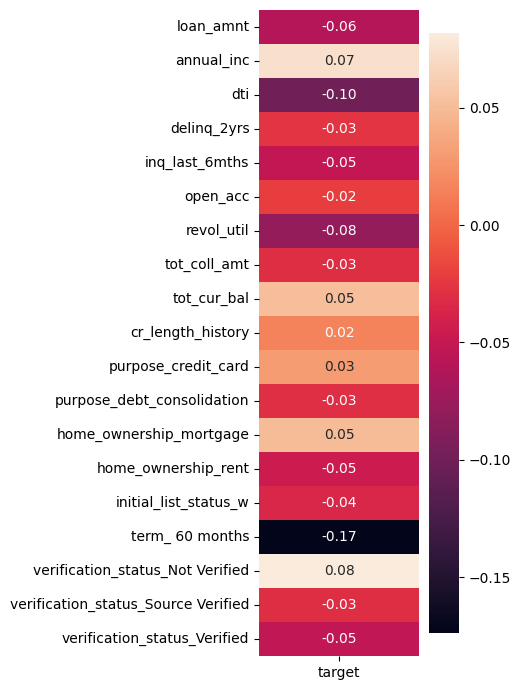

In [83]:
plt.figure(figsize=(5,7))
sns.heatmap(df2.corr(method='kendall')[df2.corr(method='kendall').index !='target'][['target']],annot=True,fmt='.2f')
plt.tight_layout()

# plt.savefig('finalkheatmap.jpg')
# files.download('finalkheatmap.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

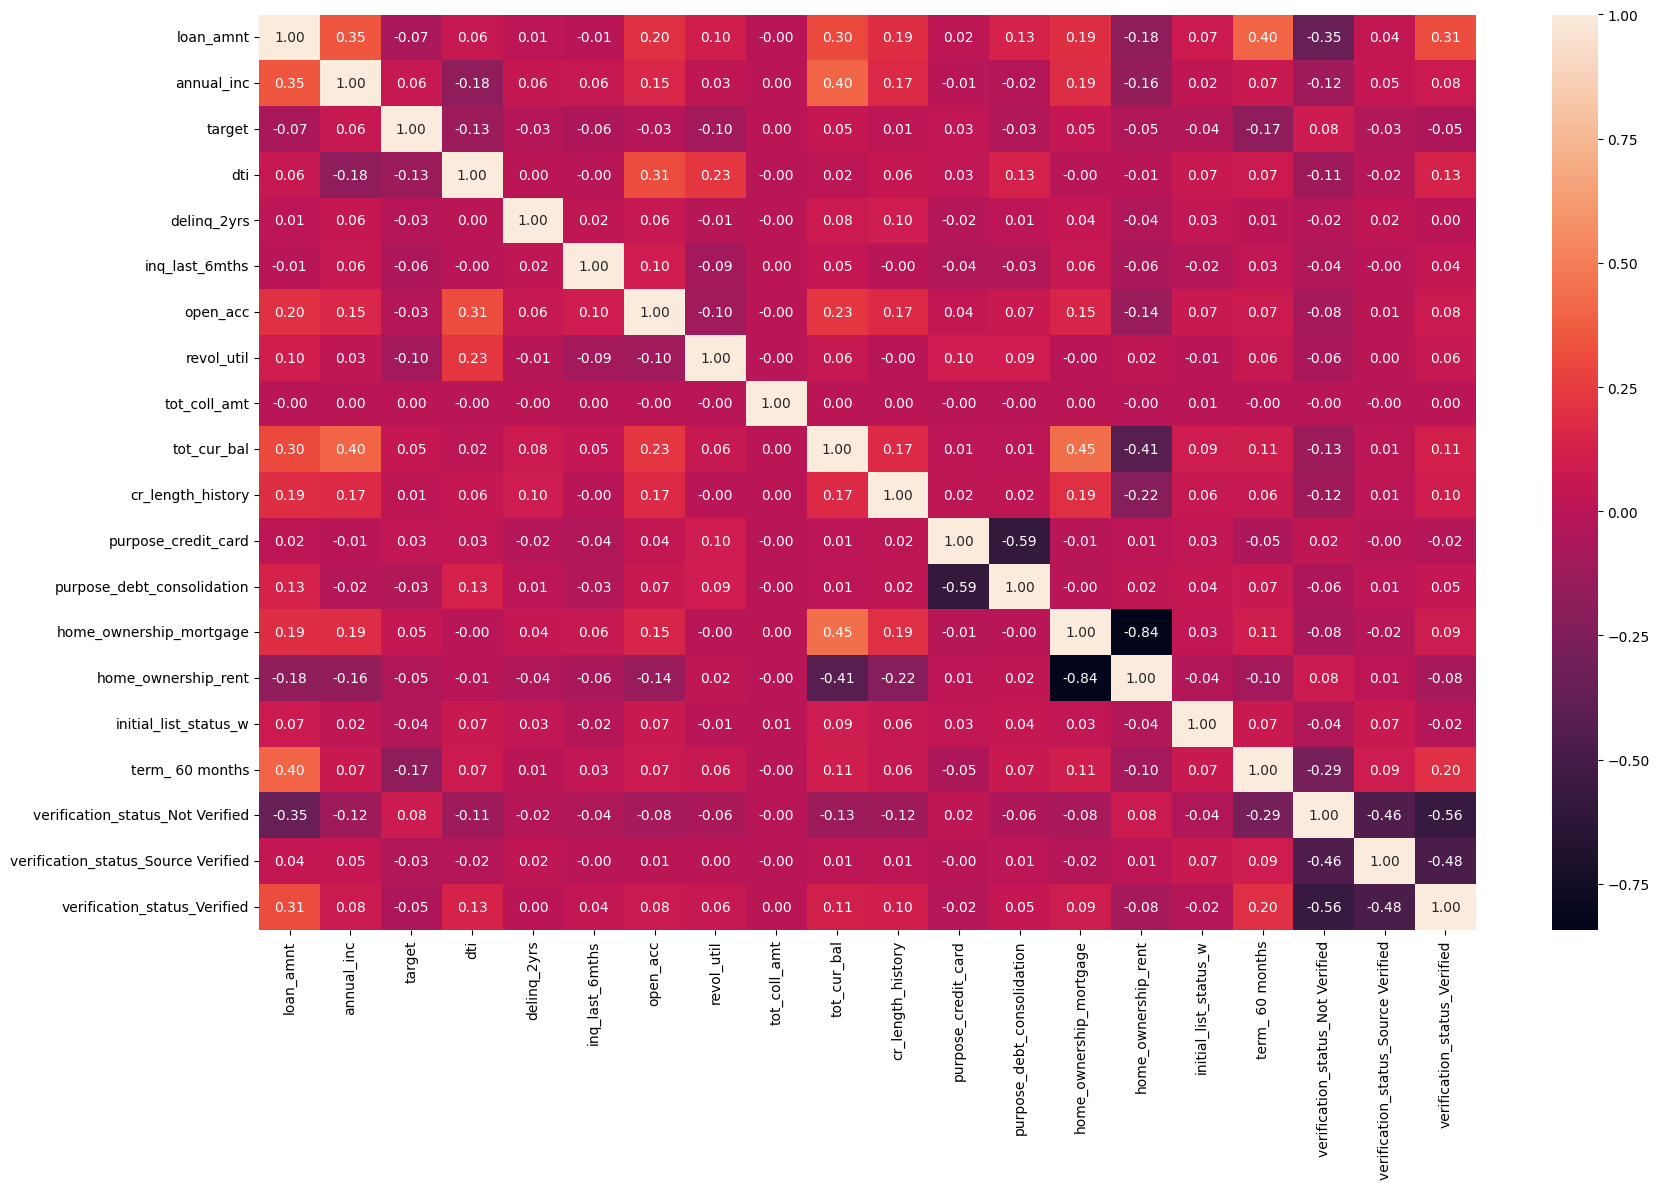

In [84]:
plt.figure(figsize=(18,12))
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.tight_layout()

# plt.savefig('finalheatmap.jpg')
# files.download('finalheatmap.jpg')

redundant:
- int_rate & grade
- initial list status f & w
- term 36 & 60 mths
  

low correlation:
- emp_length
- pub_rec
- revol_bal
- collections 12 mths ex med
- acc now delinq
- purpose_other
- home_ownership_none
- home_ownership_own


In [58]:
#redundant
df2 = df2.drop(columns=['initial_list_status_f','term_ 36 months','int_rate'],axis=1)

In [59]:
#low correlation
df2 = df2.drop(columns=['emp_length','pub_rec','revol_bal','collections_12_mths_ex_med','acc_now_delinq','purpose_other',
                        'home_ownership_none','home_ownership_own'])

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237666 entries, 0 to 466283
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            237666 non-null  int64  
 1   grade                                237666 non-null  int64  
 2   annual_inc                           237666 non-null  float64
 3   target                               237666 non-null  int64  
 4   dti                                  237666 non-null  float64
 5   delinq_2yrs                          237666 non-null  float64
 6   inq_last_6mths                       237666 non-null  float64
 7   open_acc                             237666 non-null  float64
 8   revol_util                           237666 non-null  float64
 9   tot_coll_amt                         237666 non-null  float64
 10  tot_cur_bal                          237666 non-null  float64
 11  cr_length_his

In [61]:
df2 = df2.drop(columns=['grade'],axis=1)

#Modelling

In [62]:
df3 = df2.copy()

In [63]:
y = df3['target']
X = df3[df3.columns.drop('target')]


In [64]:
y.value_counts()/len(df3)*100

1    78.556041
0    21.443959
Name: target, dtype: float64

In [65]:
y.value_counts()

1    186701
0     50965
Name: target, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20,stratify=y)

In [67]:
y_train.shape

(166366,)

In [68]:
X_train.shape

(166366, 19)

In [69]:
#Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [70]:
#machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,fbeta_score
from sklearn.metrics import roc_curve,roc_auc_score,make_scorer,confusion_matrix

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [71]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
ab = AdaBoostClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()


In [72]:
def eval_classification(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    acc_test = accuracy_score(y_test, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    prec_test = precision_score(y_test, y_pred)
    prec_train = precision_score(y_train, y_pred_train)
    rec_test = recall_score(y_test, y_pred)
    rec_train = recall_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred)
    f1_train = f1_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])

    results = {
      'accuracy (train)' : acc_train,
      'accuracy (test)' : acc_test,
      'precision (train)' : prec_train,
      'precision (test)' : prec_test,
      'recall (train)' : rec_train,
      'recall (test)' : rec_test,
      'f1 (train)' : f1_train,
      'f1 (test)' : f1_test,
      'roc(train)': roc_auc_train,
      'roc(test)': roc_auc_test
    }
    return results
  

In [73]:
# model = [knn,lr,dt,ab,rf,gb,xgb]
# result_list = []
# for model in model:
#   res = eval_classification(model)
#   result_list.append(res)

In [74]:
# df_result = pd.DataFrame(result_list,index=['knn','logreg','decisiontree','adaboost','randomforst','gradientboost','xgboost'])
# df_result

##Logistic Regression

In [75]:
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
eval_classification(lr)

{'accuracy (train)': 0.7873002897226596,
 'accuracy (test)': 0.7864796633941094,
 'precision (train)': 0.7923053802224226,
 'precision (test)': 0.7915951727293525,
 'recall (train)': 0.9883159513661997,
 'recall (test)': 0.98841278343153,
 'f1 (train)': 0.8795222563446072,
 'f1 (test)': 0.8791227986597431,
 'roc(train)': 0.680588602256615,
 'roc(test)': 0.6759222128067619}

<Axes: >

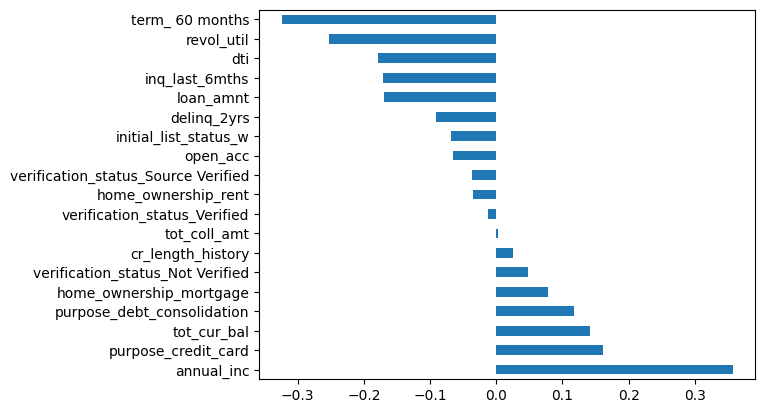

In [76]:
importance = lr.coef_[0]
importance =  pd.Series(importance,index=X.columns)
importance.nlargest(20).plot(kind='barh')

# plt.savefig('lr_importance.jpg')
# files.download('lr_importance.jpg')

##Adaboost

In [77]:
ab.fit(X_train,y_train)
y_pred_ab = ab.predict(X_test)
eval_classification(ab)


{'accuracy (train)': 0.7870237909188176,
 'accuracy (test)': 0.7859046283309958,
 'precision (train)': 0.7959034063728931,
 'precision (test)': 0.7949842897064998,
 'recall (train)': 0.980258778339748,
 'recall (test)': 0.9802535261560436,
 'f1 (train)': 0.878513581161239,
 'f1 (test)': 0.8779512764545504,
 'roc(train)': 0.6929091225773207,
 'roc(test)': 0.6774407360219825}

<Axes: >

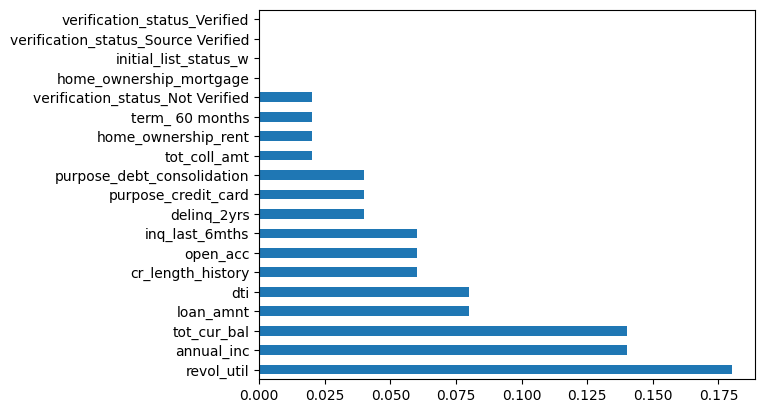

In [78]:
ada_importance = ab.feature_importances_
ada_importance = pd.Series(ada_importance,index=X.columns)
ada_importance.nlargest(20).plot(kind='barh')

# plt.savefig('ada_importance.jpg')
# files.download('ada_importance.jpg')

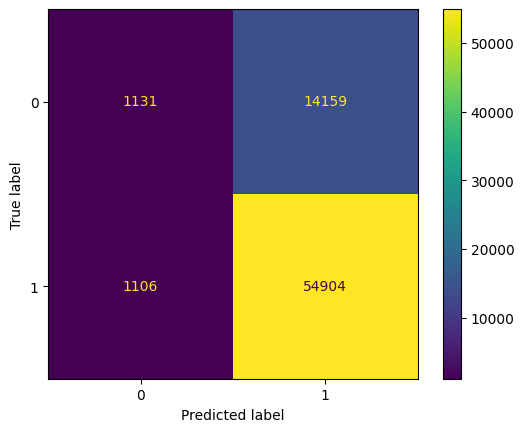

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

cf = confusion_matrix(y_test,y_pred_ab)
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()
plt.show()

# plt.savefig('cf_matrix.jpg')
# files.download('cf_matrix.jpg')

###tuning

In [80]:
# # List of hyperparameter
# hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 200)], 
#                        learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 100)],  
#                        algorithm = ['SAMME', 'SAMME.R']
#                       )

# # Init model
# ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='f1')
# ab_tuned.fit(X_train,y_train)

# # Predict & Evaluation
# eval_classification(ab_tuned)

In [81]:
# print(ab_tuned.best_estimator_.get_params())